In [3]:
import os
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
#%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns 
import cmocean
import palettable
import time


import ioeddy as io

#from ioeddy import readpln


#os.environ['PATH'] = os.environ['PATH'] + ':/Library/TeX/texbin/'

fss = 12; 
fsl = 15; 

sns.set_context('paper')
sns.set(color_codes=True, font_scale=1.75)
sns.set_palette('PuBuGn_d')
sns.set_style('ticks', {'font.family'     : ['serif'],
                        'font.serif'      : ['Times'],
                        'xtick.major.size': 3.0,
                        'xtick.minor.size': 1.5,
                        'ytick.major.size': 3.0,
                        'ytick.minor.size': 1.5,
                        'axes.edgecolor'  : 'k',
                        'axes.labelcolor' : 'k',
                        'text.color'      : 'k',
                        'xtick.color'     : 'k',
                        'ytick.color'     : 'k',
                        'image.cmap'      : 'PuBuGn'})


plt.rc('figure', figsize=[8.0, 5.0])

plt.rc('mathtext', fontset='stix')

plt.rc('axes', linewidth=1.0)
plt.rc('xtick.major', width=1.0)
plt.rc('ytick.major', width=1.0)
plt.rc('xtick.minor', width=1.0)
plt.rc('ytick.minor', width=1.0)

plt.rc('font', size=fss)
plt.rc('xtick', labelsize=fss)
plt.rc('ytick', labelsize=fss)
plt.rc('axes', labelsize=fsl)

plt.rc('axes', titlesize=fss)
plt.rc('lines', linewidth=1.0)
plt.rc('lines', markersize=4.0)

plt.rc('pdf', fonttype=3)
plt.rc('ps', fonttype=3)
plt.rc('text', usetex=True)

plt.rc('font',**{'family':'serif','serif':['Times']})

plt.rc('text.latex', preamble=[r"\usepackage[T1]{fontenc}", r"\usepackage{amsmath}"])

/home/jose/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [32]:
path = '/work/planes_F1_coarse/'
file_number = 204500

file_header_1= 'W0_k0201_n'
file_header_2= 'W0_j0017_n'
file_header_3= 'W0_j0050_n'
file_header_4= 'W0_j0002_n'
file_header_5= 'W0_j0034_n'

dirext = ''

nit  =  1

filename_1   =  path + file_header_1 + '%08d'%file_number + '.pln'
filename_2   =  path + file_header_2 + '%08d'%file_number + '.pln'
filename_3   =  path + file_header_3 + '%08d'%file_number + '.pln'
filename_4   =  path + file_header_4 + '%08d'%file_number + '.pln'
filename_5   =  path + file_header_5 + '%08d'%file_number + '.pln'

In [33]:

my_plane_1 = io.readpln(filename_1)
np1    = my_plane_1['np1'   ][0]
np2    = my_plane_1['np2'   ][0]

#grid
gc1 = my_plane_1['gc1'][0]
gc2 = my_plane_1['gc2'][0]

#data
raw_data_1 = my_plane_1['data'][0]

data_1 = np.reshape(raw_data_1,(np1,np2),order='F')

yedges = gc1
xedges = gc2

xedges[0]=0
xedges[-1]=6.283185
   
data_1[:,0] = 0.5*(data_1[:,1]+data_1[:,-2]) 
data_1[:,-1]=data_1[:,0]

data=data_1

X,Y = np.meshgrid(xedges, yedges)

df_X = pd.DataFrame(X,    index=yedges, columns=xedges)
df_Y = pd.DataFrame(Y,    index=yedges, columns=xedges)
df_U = pd.DataFrame(data, index=yedges, columns=xedges)

xmin = 0
xmax = 6.283185
ymin = 0
ymax = 10

roi = (xmin <= df_X) & (df_X <= xmax) & (ymin <= df_Y) & (df_Y <= ymax)

df_X_crop = df_X[roi].dropna(axis=[0,1], how='all')
df_Y_crop = df_Y[roi].dropna(axis=[0,1], how='all')
df_U_crop = df_U[roi].dropna(axis=[0,1], how='all')

Reading correct


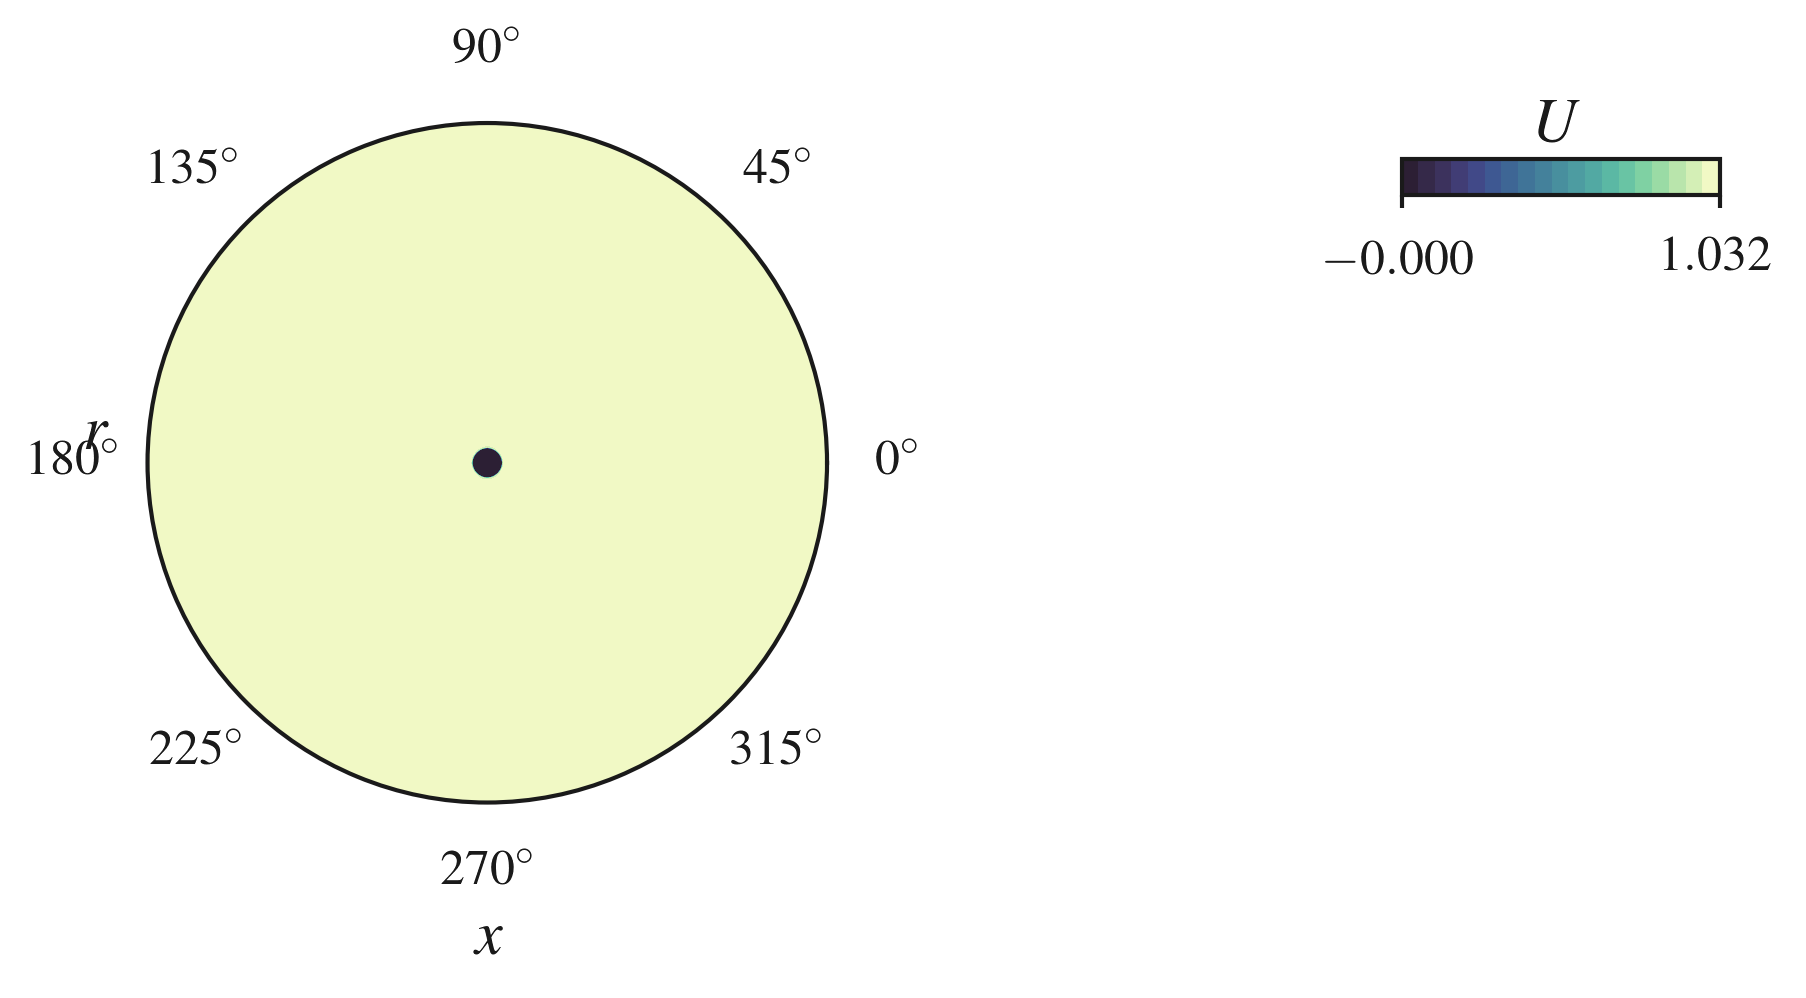

In [26]:
fig = plt.figure(figsize=(10.6,3), dpi=300)

gsp = gridspec.GridSpec(1,1)

ax0 = plt.subplot(gsp[0,0],projection='polar')

cmap = cmocean.cm.deep_r

lvls = np.linspace(np.min(data_1),np.max(data_1),20)

cs0 = ax0.contourf(df_X_crop, df_Y_crop, df_U_crop, levels=lvls, cmap=cmap)

    # add extend='both' to the options in contourf
ax0.set_aspect(1.0)

yt = np.array([0.7])

ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'$r$', rotation=0, labelpad=12)

cbaxes = fig.add_axes([0.8, 0.8, 0.1, 0.04])
cb = plt.colorbar(cs0, cax = cbaxes, orientation='horizontal', ticks=[np.min(data_1),np.max(data_1)])
cb.ax.xaxis.set_label_position('top')
cb.set_label(r"$U$")


plt.show()

Reading correct
Reading correct


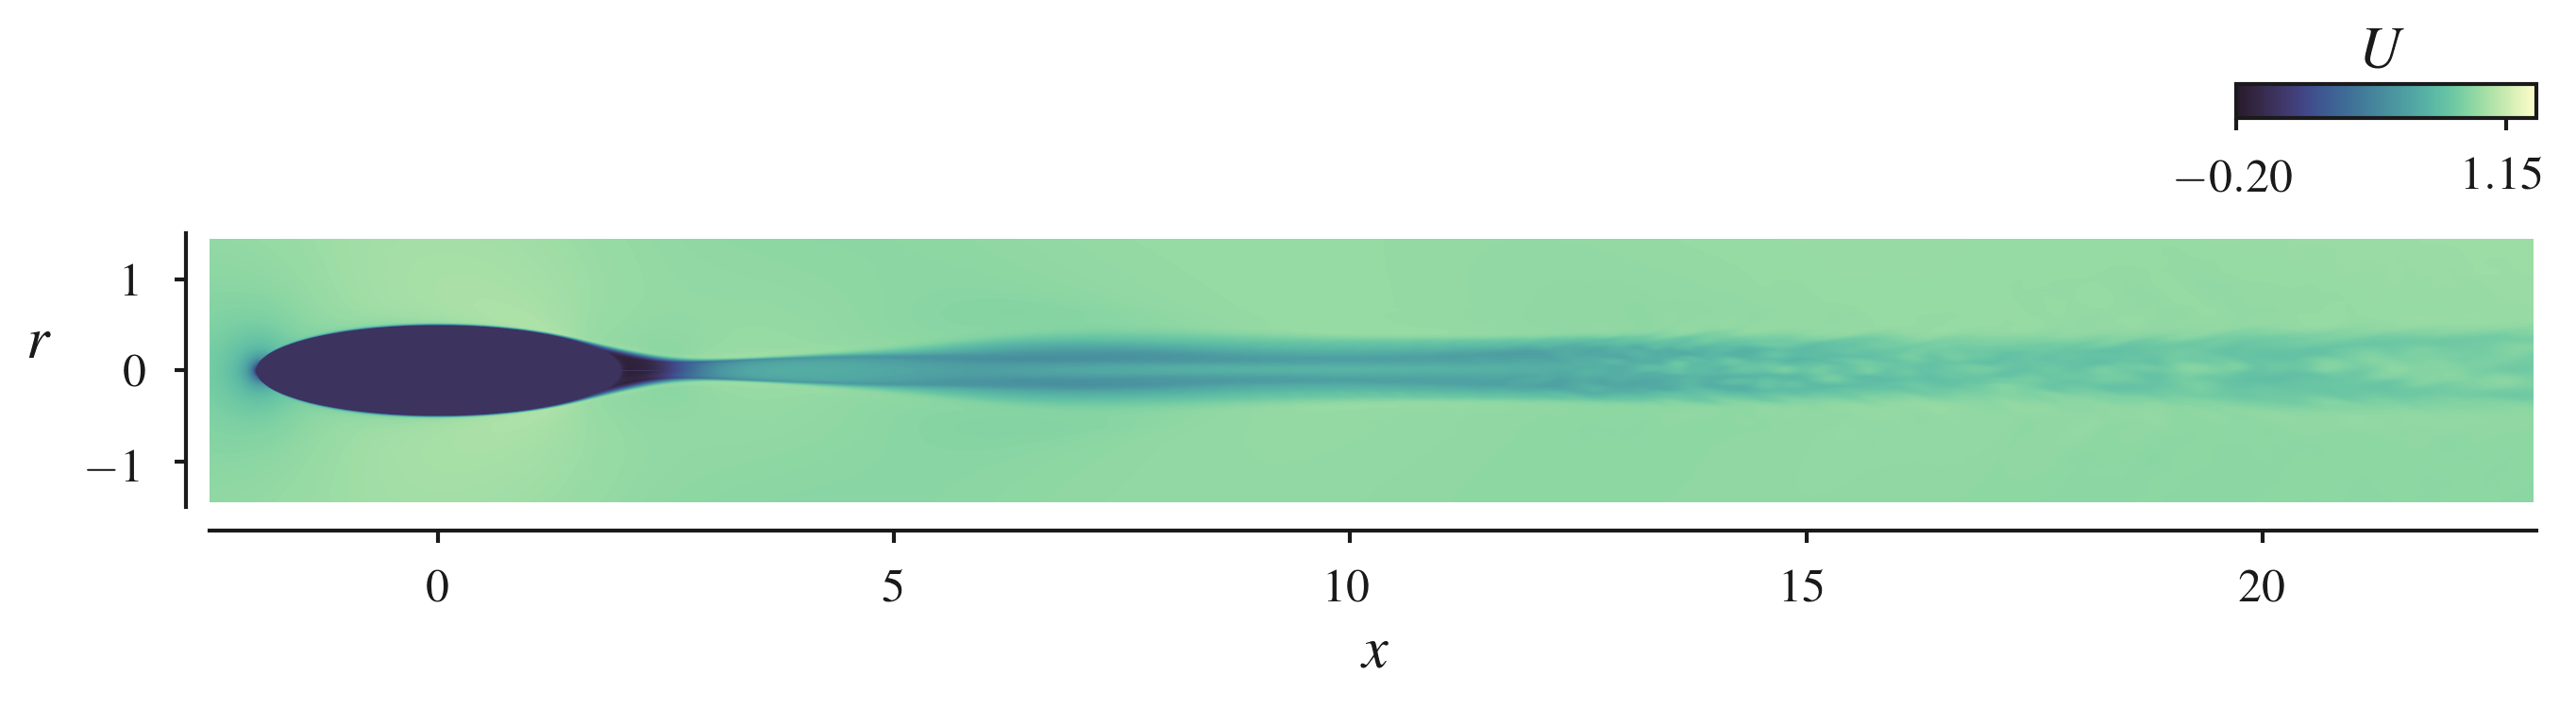

In [34]:
my_plane_2 = io.readpln(filename_2)
my_plane_3 = io.readpln(filename_3)
np1    = my_plane_2['np1'   ][0]
np2    = my_plane_2['np2'   ][0]

    #grid
gc1 = my_plane_2['gc1'][0]
gc2 = my_plane_2['gc2'][0]

    #data
raw_data_2 = my_plane_2['data'][0]
raw_data_3 = my_plane_3['data'][0]

data_2 = np.reshape(raw_data_2,(np1,np2),order='F')
data_3 = np.reshape(raw_data_3,(np1,np2),order='F')

yedges = np.concatenate((-gc1[::-1],gc1),axis=0)
xedges = gc2

data=np.concatenate((np.flip(data_3,axis=0),data_2),axis=0)

X,Y = np.meshgrid(xedges, yedges)

df_X = pd.DataFrame(X,    index=yedges, columns=xedges)
df_Y = pd.DataFrame(Y,    index=yedges, columns=xedges)
df_U = pd.DataFrame(data, index=yedges, columns=xedges)

xmin = -2.5
xmax = 23.0
ymin =  -1.5
ymax =  1.5

roi = (xmin <= df_X) & (df_X <= xmax) & (ymin <= df_Y) & (df_Y <= ymax)

df_X_crop = df_X[roi].dropna(axis=[0,1], how='all')
df_Y_crop = df_Y[roi].dropna(axis=[0,1], how='all')
df_U_crop = df_U[roi].dropna(axis=[0,1], how='all')

fig = plt.figure(figsize=(10.6,3), dpi=300)

gsp = gridspec.GridSpec(1,1)

ax0 = plt.subplot(gsp[0,0])

cmap = cmocean.cm.deep_r

lvls = np.linspace(-0.2,1.3,251)

cs0 = ax0.contourf(df_X_crop, df_Y_crop, df_U_crop, levels=lvls, cmap=cmap)

# add extend='both' to the options in contourf

# Fill the body:
#xs = np.linspace(-1.99,1.99,50)
#xs = 2*np.sin(xs*np.pi/4)
#ys = 0.5*np.sqrt(1-(xs/2)**2)
#ax0.fill_between(xs,-ys, ys, interpolate=True, color='b')

ax0.set_aspect(1.0)

sns.despine(ax=ax0, offset=6)

ax0.set_xlim([xmin, xmax])
ax0.set_ylim([ymin, ymax])

xt = np.linspace(0, 20, 5)
yt = np.array([-1, 0, 1])

ax0.set_xticks(xt)
ax0.set_yticks(yt)

ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'$r$', rotation=0, labelpad=12)

cbaxes = fig.add_axes([0.8, 0.8, 0.1, 0.04])
cb = plt.colorbar(cs0, cax = cbaxes, orientation='horizontal', ticks=[-0.2,1.15])
    #cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')
cb.set_label(r"$U$")
plt.show()


Reading correct
Reading correct


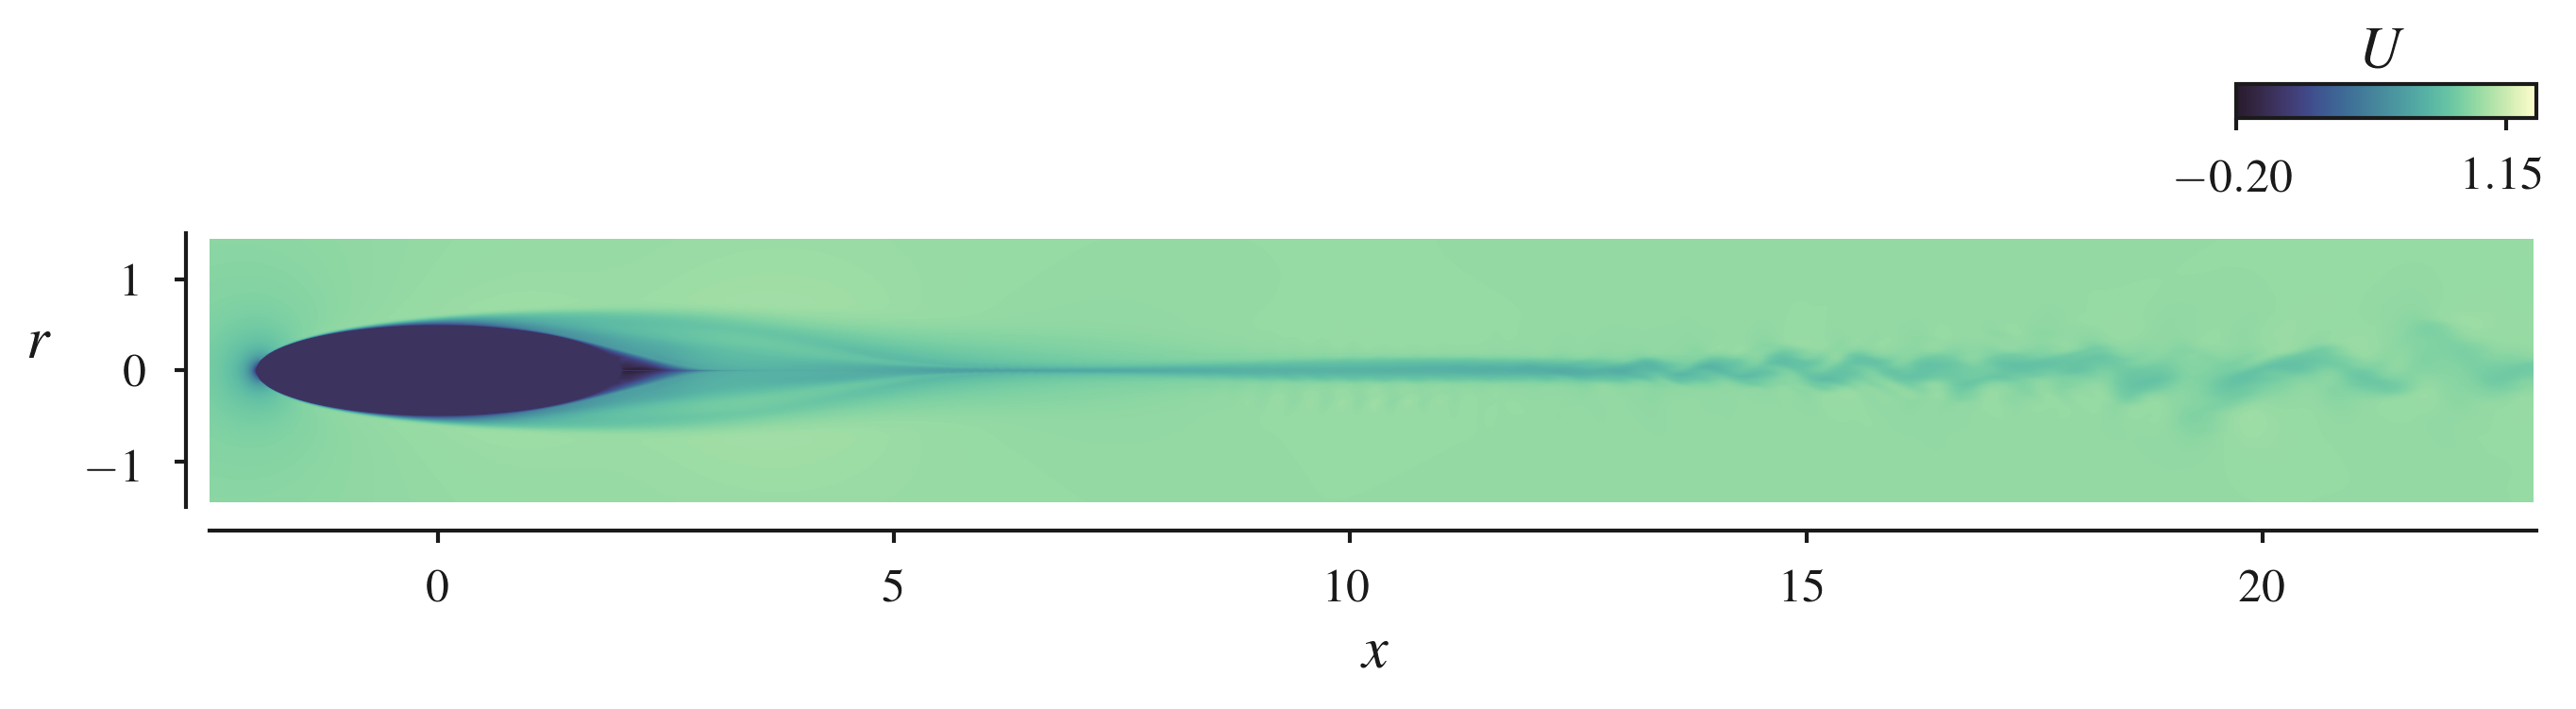

In [35]:
my_plane_4 = io.readpln(filename_4)
my_plane_5 = io.readpln(filename_5)
np1    = my_plane_4['np1'   ][0]
np2    = my_plane_4['np2'   ][0]

    #grid
gc1 = my_plane_4['gc1'][0]
gc2 = my_plane_4['gc2'][0]

    #data
raw_data_4 = my_plane_4['data'][0]
raw_data_5 = my_plane_5['data'][0]

data_4 = np.reshape(raw_data_4,(np1,np2),order='F')
data_5 = np.reshape(raw_data_5,(np1,np2),order='F')

yedges = np.concatenate((-gc1[::-1],gc1),axis=0)
xedges = gc2

data=np.concatenate((np.flip(data_5,axis=0),data_4),axis=0)

X,Y = np.meshgrid(xedges, yedges)

df_X = pd.DataFrame(X,    index=yedges, columns=xedges)
df_Y = pd.DataFrame(Y,    index=yedges, columns=xedges)
df_U = pd.DataFrame(data, index=yedges, columns=xedges)

xmin = -2.5
xmax = 23.0
ymin =  -1.5
ymax =  1.5

roi = (xmin <= df_X) & (df_X <= xmax) & (ymin <= df_Y) & (df_Y <= ymax)

df_X_crop = df_X[roi].dropna(axis=[0,1], how='all')
df_Y_crop = df_Y[roi].dropna(axis=[0,1], how='all')
df_U_crop = df_U[roi].dropna(axis=[0,1], how='all')

fig = plt.figure(figsize=(10.6,3), dpi=300)

gsp = gridspec.GridSpec(1,1)

ax0 = plt.subplot(gsp[0,0])

cmap = cmocean.cm.deep_r

lvls = np.linspace(-0.2,1.3,251)

cs0 = ax0.contourf(df_X_crop, df_Y_crop, df_U_crop, levels=lvls, cmap=cmap)

# add extend='both' to the options in contourf

# Fill the body:
#xs = np.linspace(-1.99,1.99,50)
#xs = 2*np.sin(xs*np.pi/4)
#ys = 0.5*np.sqrt(1-(xs/2)**2)
#ax0.fill_between(xs,-ys, ys, interpolate=True, color='b')

ax0.set_aspect(1.0)

sns.despine(ax=ax0, offset=6)

ax0.set_xlim([xmin, xmax])
ax0.set_ylim([ymin, ymax])

xt = np.linspace(0, 20, 5)
yt = np.array([-1, 0, 1])

ax0.set_xticks(xt)
ax0.set_yticks(yt)

ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'$r$', rotation=0, labelpad=12)

cbaxes = fig.add_axes([0.8, 0.8, 0.1, 0.04])
cb = plt.colorbar(cs0, cax = cbaxes, orientation='horizontal', ticks=[-0.2,1.15])
    #cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')
cb.set_label(r"$U$")
plt.show()

